In [616]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.integrate import quad
import corner
import emcee
import scipy

In [630]:
 def pdf(x, lambda_n): 
        N_exposant = np.arange(len(lambda_n))
        x_to_n = x**N_exposant
        return np.exp(-np.mean(x_to_n*lambda_n))
    
def __integrand__(x, lambda_n, n):
        return x ** n * pdf(x, lambda_n)
    
def mu_n(n, lambda_n):
    #model
    down,  up = 0, 1
    return np.array(quad(__integrand__, down,  up, args = (lambda_n, n))[0])

In [650]:
n_moment = 10

In [655]:
mu_n_true = np.linspace(1, .01, n_moment)

In [656]:
def f(l_n):
    n = n_moment
    res = np.zeros(n)
    for i, n_ in enumerate(np.arange(n)):
        res[i] = mu_n(i, l_n)
    return res - mu_n_true

In [657]:
res = fsolve(f, x0 = mu_n_true)
res = fsolve(f, x0 = res)
res = fsolve(f, x0 = res)
#res = fsolve(f, x0 = res)
print(f(res))

/pbs/home/c/cpayerne/.conda/envs/mydesc/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/pbs/home/c/cpayerne/.conda/envs/mydesc/lib/python3.7/site-packages/ipykernel_launcher.py:12: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  if sys.path[0] == '':


[ 0.15617888 -0.10458052 -0.15311594 -0.1420003  -0.10288697 -0.04741314
  0.01883602  0.09270974  0.17224231  0.25612272]


In [654]:
res

array([ 7.18339473e+01, -7.94281270e+02, -6.98254725e+03,  3.07352673e+05,
       -2.82857168e+06,  1.23025599e+07, -2.93877213e+07,  3.96008659e+07,
       -2.82755917e+07,  8.32891675e+06])

6.065306597126333
3.487176165011568
1.775118919659959
1.337232258279016
1.1730414733098449
1.0920348136095968
1.0459571691291443
1.0173747595146916


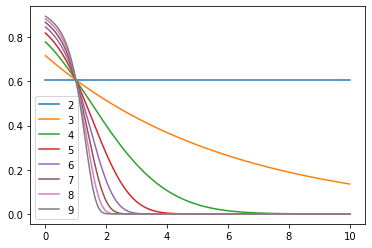

In [649]:
from scipy.stats import poisson

x = np.linspace(0, 10, 1000)
for n in range(2,10):
    res = np.linspace(1,0, n)
    y = [pdf(x_, res) for x_ in x]
    print(scipy.integrate.simps(y,x))
    plt.plot(x, y, label = f'{n}')
plt.legend()
#plt.yscale('log')